In [36]:
import pandas as pd
import re
import os
from pathlib import Path
from matplotlib import pyplot as plt

In [37]:
# os.chdir('put/directory/here')  ## Only if you want to change to a different directory
file = '../files/nvt_production_363K-1bar_nose-hoover-parrinello-rahman.xvg'
energy = open(file,'r').readlines()

In [43]:
# ================================
# Plot options
# ================================

font_size = 25
width = 1
params = {
    'axes.labelsize': font_size,
    'axes.linewidth': width,
    'figure.facecolor': 'white',
    'xtick.labelsize': font_size,
    'ytick.labelsize': font_size,
    'font.family' : 'CMU Serif',
    'text.usetex': True, 
    'text.latex.preamble': r'\usepackage{siunitx, mhchem}',
    'lines.linewidth' : width,
    'lines.linestyle' : '-',
    'lines.marker' : None,
    'lines.markersize' : 10,
    'legend.fontsize': font_size,
    'axes.titlesize': 1.5*font_size,
    'legend.fontsize': font_size,
    'font.family': 'serif',
    'grid.color' : 'gray',
    'figure.figsize' : (12,7)
}

plt.rcParams.update(params)

In [39]:
# Getting property names
titles = []
for line in energy[:]:
    result = re.search(r"@ s([0-9]+) legend \"(.+?)\"", line)
    if result:
        titles.append(line.split('"')[-2])
    if line.startswith('@') or line.startswith('#'):
        energy.remove(line)

# Creating the dictionary with property values
energy_dict = {}
time = []
for line in energy:
    time.append(float(line.split()[0]))
for i in range(len(titles)):
    aux = []
    for line in energy:
        aux.append(float(line.split()[i+1]))
    energy_dict[titles[i]] = aux
    
# Creating properties dataframe

energy_df = pd.DataFrame(energy_dict,index=time)

In [40]:
energy_df

,Potential,Kinetic En.,Total Energy,Temperature,Pressure
0.0,-1983.835205,29416.195312,27432.359375,388.850372,187.255249
0.5,-4261.545898,26296.621094,22035.074219,347.612976,-621.192749
1.0,-4161.297852,27109.535156,22948.238281,358.358826,-549.592834
1.5,-3043.042480,28382.703125,25339.660156,375.188721,534.944214
2.0,-3489.375732,27575.748047,24086.373047,364.521637,172.275421
...,...,...,...,...,...
59998.0,-5578.201172,24877.740234,19299.539062,328.856903,-275.029480
59998.5,-2052.374268,29455.515625,27403.140625,389.370148,592.862183
59999.0,-3315.090820,27330.199219,24015.109375,361.275757,-268.373169
59999.5,-4805.687500,26011.585938,21205.898438,343.845093,-556.001099


In [41]:
energy_df.mean()

Potential       -3377.281636
Kinetic En.     27461.117458
Total Energy    24083.835824
Temperature       363.006349
Pressure           51.350157
dtype: float64

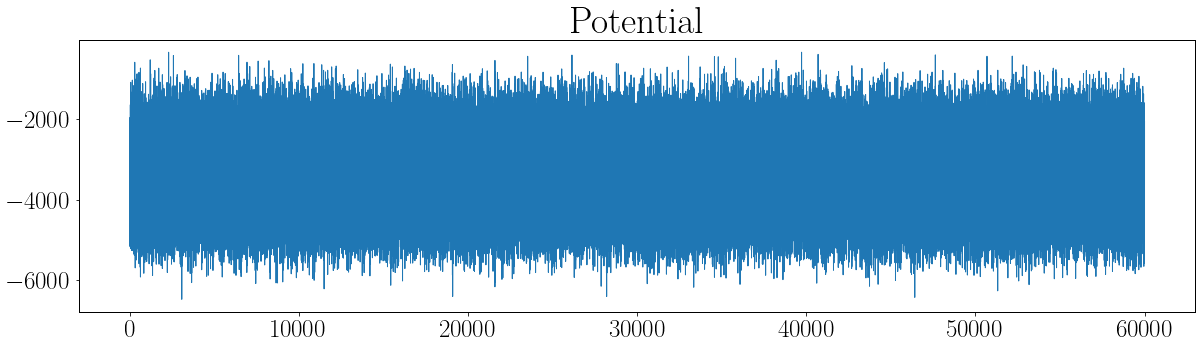

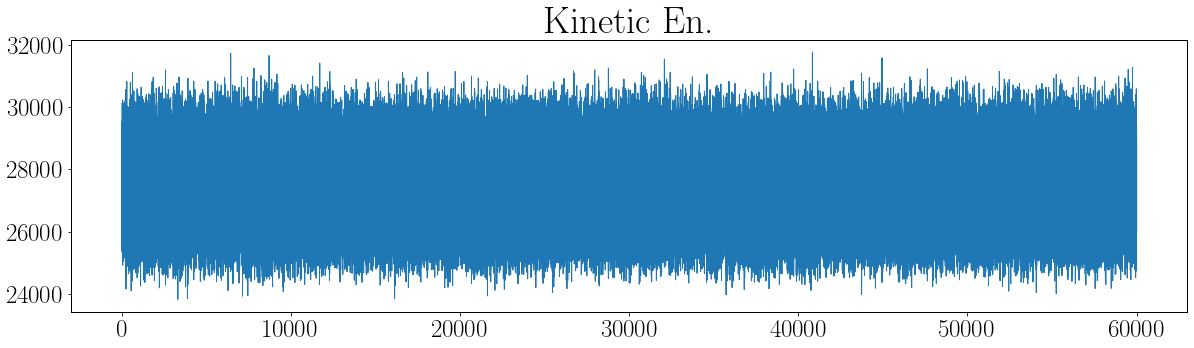

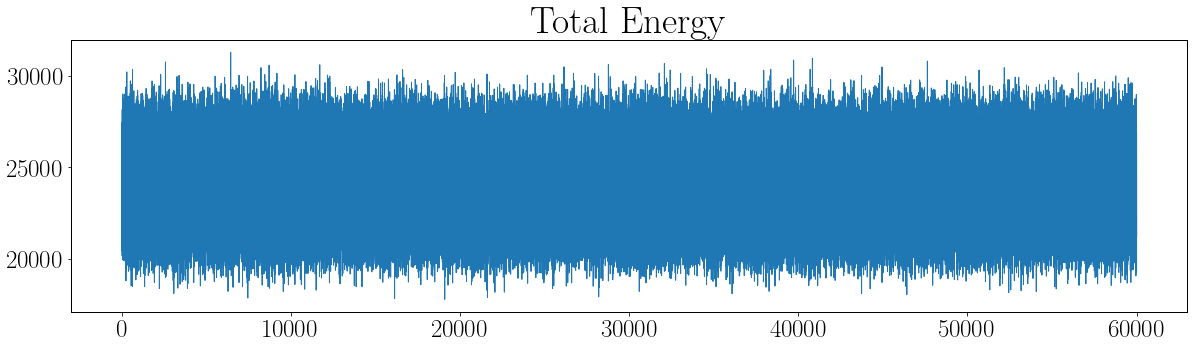

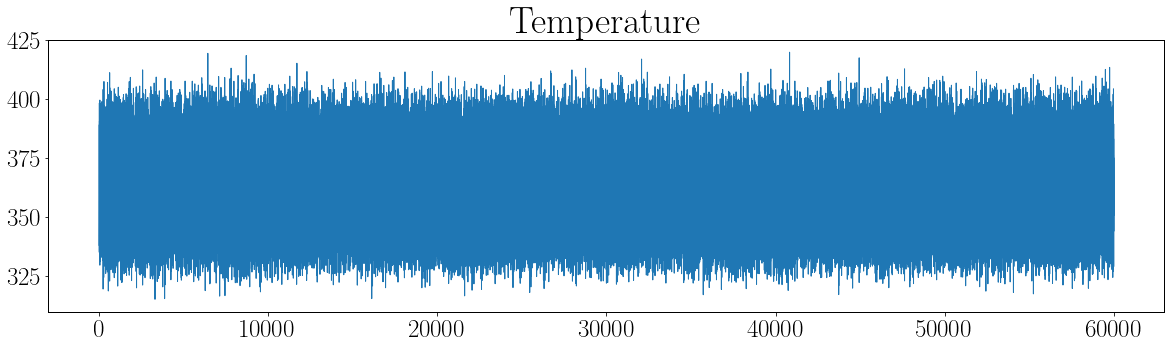

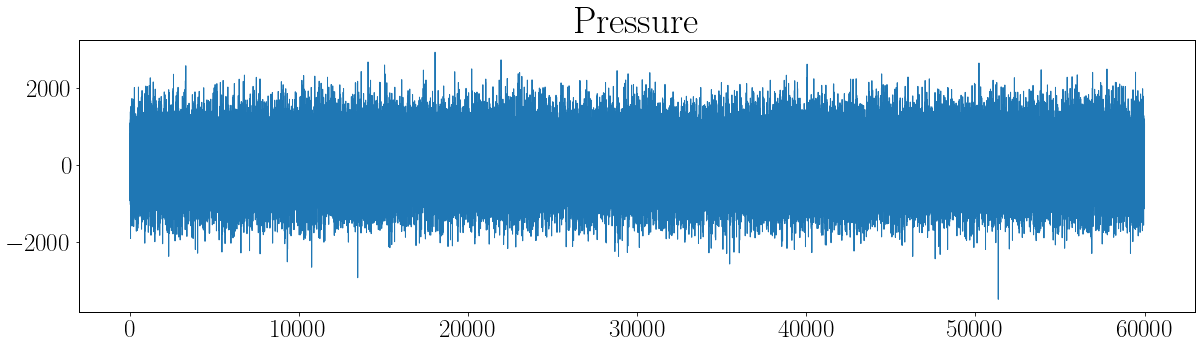

In [50]:
for prop in energy_df.columns:
    energy_df[prop].plot(figsize=(20,5),title=prop)
    plt.show()